# Importer les librairies

In [107]:
import pandas as pd
import numpy as np
import scipy
import sklearn

# Data Acces

In [108]:
data=pd.read_csv(r"C:\Users\sambe\Desktop\AIVANCITY\DM/diamonds.csv")

In [109]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
34831,34832,0.30,Very Good,H,VVS1,63.3,60.0,878,4.25,4.22,2.68
46674,46675,0.59,Premium,E,SI1,61.8,60.0,1789,5.39,5.33,3.31
11451,11452,1.01,Premium,G,SI1,62.6,60.0,5006,6.36,6.29,3.96
48417,48418,0.70,Very Good,I,VS1,62.4,58.0,1971,5.62,5.67,3.52
7164,7165,0.90,Premium,G,VS2,60.9,58.0,4183,6.34,6.19,3.79


<AxesSubplot:ylabel='Frequency'>

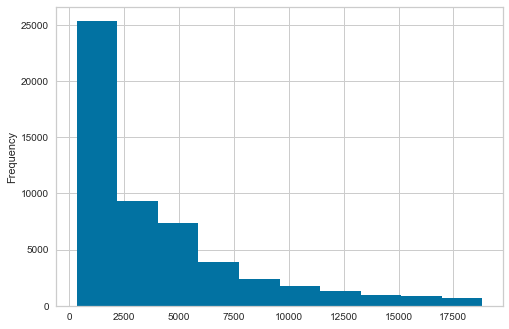

In [110]:
data.price.plot(kind="hist")

In [111]:
data.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [112]:
dispersion=data.price.std()/data.price.mean()*100
dispersion

101.44019579531273

In [113]:
#dans le magazin, nous disposons de 53940 diamands dont les prix varient entre 326 et 18800 avec une moyenne de 3932. Cependant les prix sont dispersés (disp>50%)

<AxesSubplot:>

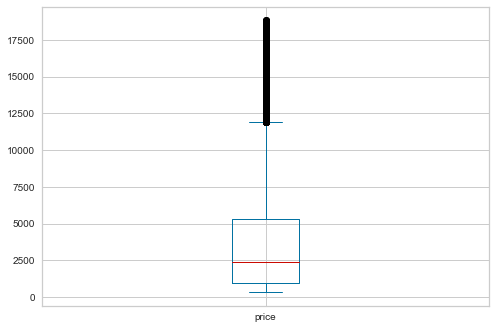

In [114]:
data.price.plot(kind="box")

In [115]:
#les prix qui depassent 12500 peuvent etre considérés comme etant trop chers

<AxesSubplot:ylabel='Density'>

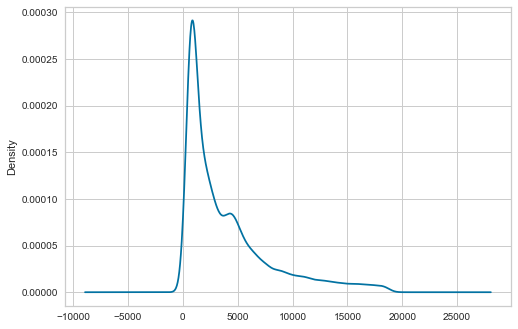

In [116]:
data.price.plot(kind="density")

In [117]:
#Visuellement les prix n'ont pas été choisis de manieure haserdeuse!!!   (les prix ne sont pas normales)

# Data insignifiantes

In [118]:
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [119]:
data=data.drop(columns="Unnamed: 0")
data.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
40706,0.52,Ideal,D,SI2,61.0,56.0,1158,5.17,5.22,3.17
11525,1.12,Premium,I,VS2,61.9,58.0,5027,6.63,6.68,4.12
21827,1.52,Good,H,SI1,63.8,60.0,9898,7.24,7.30,4.64
24726,2.20,Premium,J,SI2,60.9,60.0,13065,8.42,8.34,5.10
23267,2.04,Very Good,J,SI2,61.7,57.0,11276,8.10,8.13,5.01


In [120]:
data.shape

(53940, 10)

In [121]:
1/11*100   #il y a 9% de données insignifiantes
#decision: on les supprime

9.090909090909092

# Data dupliquées

In [122]:
data.duplicated().sum()

146

In [123]:
data.shape

(53940, 10)

In [124]:
146/53940*100   #il y a 0.3% de donnees dupliquées
#decision: on les supprime

0.2706711160548758

In [125]:
data=data.drop_duplicates()


In [126]:
data.duplicated().sum()

0

# Data Aberrantes

In [127]:
# X est aberrante sssi X<Q1-1.5(Q3-Q1) ou X>Q3+1.5(Q3-Q1)

In [128]:
Q1=data.quantile(0.25)  #le premier quartile
Q3=data.quantile(0.75)   #le troisieme
IQR=Q3-Q1     #l'ecart interquartile
low=Q1-1.5*IQR
high=Q3+1.5*IQR

In [129]:
low

carat      -0.560
depth      58.750
table      51.500
price   -5612.625
x           1.965
y           1.990
z           1.230
dtype: float64

In [130]:
high

carat        2.000
depth       64.750
table       63.500
price    11890.375
x            9.285
y            9.270
z            5.710
dtype: float64

In [131]:
#les prix qui depassent 11890 peuvent etre considerés comme aberants

<AxesSubplot:ylabel='Frequency'>

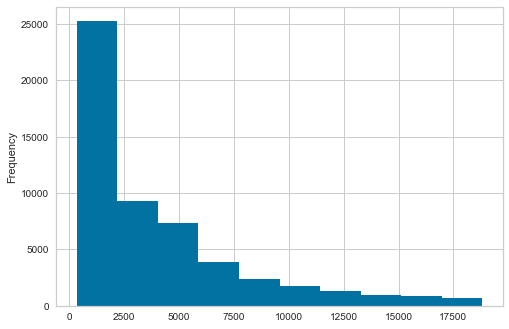

In [132]:
data.price.plot(kind="hist")

<AxesSubplot:>

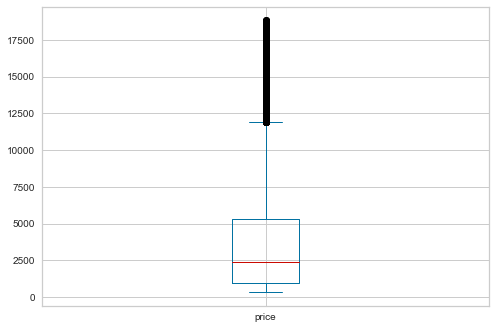

In [133]:
data.price.plot(kind="box")

<AxesSubplot:xlabel='price'>

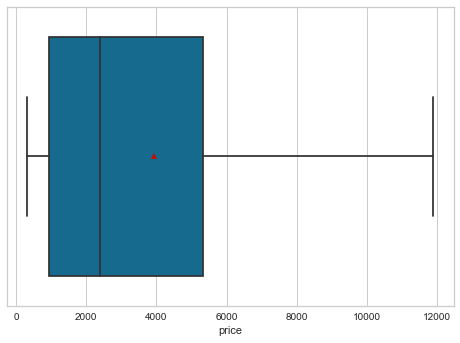

In [134]:
import seaborn
seaborn.boxplot(data=data, x="price", showfliers=False, showmeans=True)

In [135]:
taux_aberante=((data<low)|(data>high)).sum()/data.shape[0]*100
taux_aberante

C:\Users\sambe\AppData\Local\Temp\ipykernel_18100\1582619850.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  taux_aberante=((data<low)|(data>high)).sum()/data.shape[0]*100


carat      3.481801
clarity    0.000000
color      0.000000
cut        0.000000
depth      4.693832
price      6.549058
table      1.122802
x          0.057627
y          0.052050
z          0.089229
dtype: float64

In [136]:
# On a plus de 5% de donnée aberrante pour les variables price, c'est une très mauvaise nouvelle

# Data Manquantes

In [137]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [138]:
#Aucune donnees manquantes

# Data Echelle

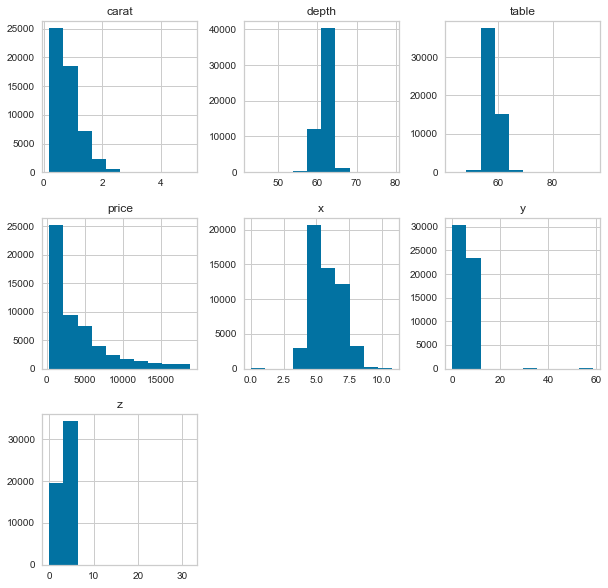

In [139]:
data.hist(figsize=(10,10));

In [140]:
#les donnees ne sont pas aux memes echelles: carat en unités, depth en dizaines, price en milliers
#decision: on normalisera apres notre analyse

# Data Manipulation

In [141]:
data.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
48408,0.72,Very Good,H,SI2,62.6,53.0,1970,5.75,5.78,3.61
51290,0.57,Ideal,F,VVS2,61.5,57.0,2360,5.36,5.31,3.28
1669,0.75,Premium,D,SI1,59.2,58.0,3024,5.96,5.93,3.52
10592,0.91,Very Good,E,VS2,62.8,59.0,4823,6.15,6.17,3.87
34384,0.41,Ideal,F,VS2,62.7,56.0,863,4.72,4.78,2.98


In [142]:
#x y et z representent les "corrdonnées" des diamants qui nous permettent de trouver le volume

In [143]:
data["volume"]=data["x"]*data["y"]*data["z"]
data.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
16491,1.04,Ideal,G,VS2,62.5,57.0,6589,6.46,6.49,4.05,169.797870
40312,0.40,Premium,E,VS1,62.4,54.0,1125,4.75,4.71,2.95,65.998875
35686,0.30,Premium,D,VS2,62.6,61.0,911,4.25,4.22,2.65,47.527750
12131,1.08,Fair,H,VVS2,55.9,63.0,5171,6.90,6.80,3.83,179.703600
36935,0.23,Very Good,E,VVS1,61.2,57.0,478,3.96,3.98,2.43,38.298744


In [144]:
data=data.drop(columns=["x","y","z"])
data.sample(5)

,carat,cut,color,clarity,depth,table,price,volume
28224,0.33,Ideal,F,VS2,62.1,55.0,666,55.099455
6435,0.91,Premium,G,SI1,62.6,58.0,4045,145.852630
26513,2.05,Good,G,SI2,63.7,61.0,16148,327.214470
22038,0.31,Ideal,I,VS1,61.9,54.0,628,51.324840
47260,0.77,Very Good,J,VS2,62.1,62.0,1843,124.013142


# Data Analyse

In [145]:
#On va analyser la variable à predire

In [146]:
data.describe()

,carat,depth,table,price,volume
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,129.826975
std,0.47339,1.429909,2.233679,3988.114460,78.160819
min,0.20000,43.000000,43.000000,326.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,65.190168
50%,0.70000,61.800000,57.000000,2401.000000,114.840180
75%,1.04000,62.500000,59.000000,5326.750000,170.823600
max,5.01000,79.000000,95.000000,18823.000000,3840.598060


In [147]:
data.describe().price

count    53794.000000
mean      3933.065082
std       3988.114460
min        326.000000
25%        951.000000
50%       2401.000000
75%       5326.750000
max      18823.000000
Name: price, dtype: float64

<AxesSubplot:>

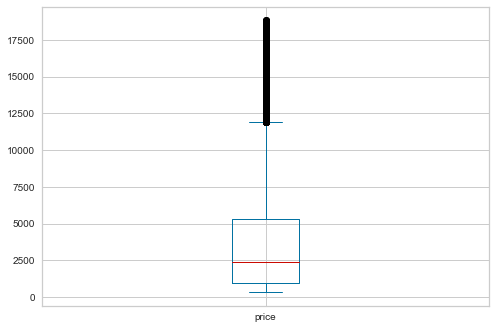

In [148]:
data.price.plot(kind="box")

In [149]:
#Dans notre magazin, nous disposons de 53794 diamants. les prix varient entre 326 et 18823 avec une moyenne de 3933.
#50% des diamants coutent moins que 2401, 25% coutent moins que 951 et 25% depassent 5326.
#A partir de 11890, les prix peuvent etre considérés comme aberants (trop chers) et ils represent plus de 6%.

In [150]:
#est ce que les prix dans le magazin ont ete generés aleatoirement (par hasard)?

<AxesSubplot:ylabel='Density'>

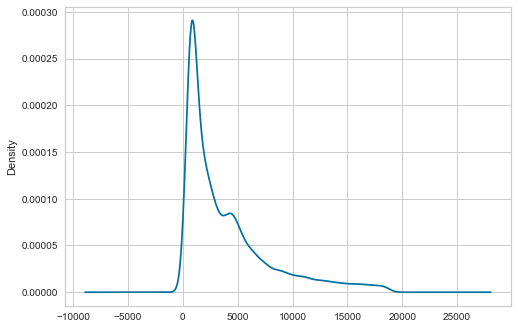

In [151]:
data.price.plot(kind="density")

In [152]:
#calculons le coefficient d assymetrie (ref loi normale symetrie skew=0)
data.skew()   #skew>0 la courbe est decallée vers la droite par rapport à la loi normale

C:\Users\sambe\AppData\Local\Temp\ipykernel_18100\3881249153.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()   #skew>0 la courbe est decallée vers la droite par rapport à la loi normale


carat     1.113651
depth    -0.114250
table     0.792227
price     1.618240
volume    3.048210
dtype: float64

In [153]:
#calculons le coefficient d applatissement (ref loi normale kurtosis=0)
data.kurtosis()   #kurtosis>0 la courbe est pointue par rapport à la loi normale

C:\Users\sambe\AppData\Local\Temp\ipykernel_18100\2566119085.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()   #kurtosis>0 la courbe est pointue par rapport à la loi normale


carat      1.247158
depth      5.412989
table      2.775360
price      2.178453
volume    95.522483
dtype: float64

In [154]:
#il semblerait que les prix ne suivent pas la loi normale

In [155]:
#conclusion: 
#Dans notre magazin, nous disposons de 53794 diamants. les prix varient entre 326 et 18823 avec une moyenne de 3933.
#50% des diamants coutent moins que 2401, 25% coutent moins que 951 et 25% depassent 5326.
#A partir de 11890, les prix peuvent etre considérés comme aberants (trop chers) et ils represent plus de 6%.
#les prix ne suivent pas la loi normale et donc il y a forcement des facteurs explicatives


In [156]:
#maintenent on va essayer de voir les variables explicatives

In [157]:
data.corr().price

carat     0.921548
depth    -0.011048
table     0.126566
price     1.000000
volume    0.902231
Name: price, dtype: float64

In [158]:
#les carat, volume influent fortement sur le prix (moins que la profondeur et le table)

In [159]:
data.corr()

,carat,depth,table,price,volume
carat,1.000000,0.027861,0.181091,0.921548,0.976227
depth,0.027861,1.000000,-0.297669,-0.011048,0.008704
table,0.181091,-0.297669,1.000000,0.126566,0.166813
price,0.921548,-0.011048,0.126566,1.000000,0.902231
volume,0.976227,0.008704,0.166813,0.902231,1.000000


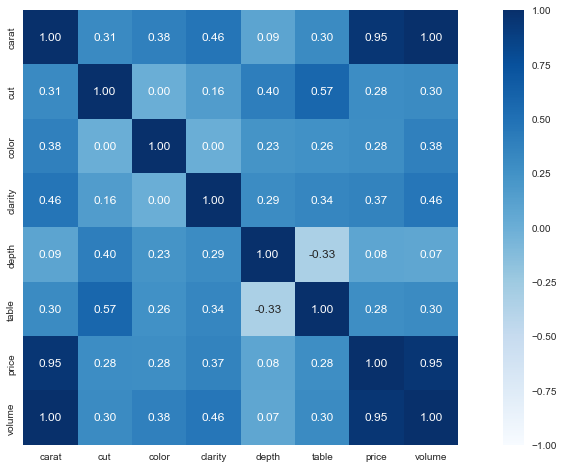

In [160]:
#pip install dython
import matplotlib.pyplot as plt # Plotting
from dython.nominal import associations
fig, ax = plt.subplots(figsize=(16, 8))
r = associations(data.sample(100), ax = ax, cmap = "Blues")

In [161]:
data.corr().price

carat     0.921548
depth    -0.011048
table     0.126566
price     1.000000
volume    0.902231
Name: price, dtype: float64

In [162]:
#price et depth sont correlés à -1.1%  

In [163]:
#pour etre sùr de la significativité de cette correlation, il faut faire un test de PEARSON.

In [164]:
#h0: les variables sont INDEPENDANTES
scipy.stats.pearsonr(data.price,data.depth)

(-0.011047521867868452, 0.010397267269465686)

In [165]:
#ici pvalue=0.010397267269465686<5% dont on rejete l'idee d'INDEPENDANCE

In [166]:
scipy.stats.pearsonr(data.price,data.table)

(0.1265660874434255, 6.378106847256486e-191)

In [167]:
#avec ces 2 tests, on peut conclure que les variables depth et table sont liées significativement avec notre variable price

In [168]:
# Import library as pg
import pingouin as pg
# Perform a hypothesis testing
(pg.pairwise_corr(data.sample(100),columns = data.columns, method = 'pearson').round(3)
).query('X=="price" or Y=="price"')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
2,carat,price,pearson,two-sided,100,0.941,"[0.91, 0.96]",0.000,1.782e+44,1.000
5,depth,price,pearson,two-sided,100,0.067,"[-0.13, 0.26]",0.509,0.155,0.101
7,table,price,pearson,two-sided,100,0.067,"[-0.13, 0.26]",0.508,0.155,0.102
9,price,volume,pearson,two-sided,100,0.939,"[0.91, 0.96]",0.000,5.574e+43,1.000


# Data Split X y

In [169]:
y=data.price                   #variable à expliquer
X=data.drop(columns="price")   #variable explicatives

In [170]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [171]:
X.head()

,carat,cut,color,clarity,depth,table,volume
0,0.23,Ideal,E,SI2,61.5,55.0,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,34.505856
2,0.23,Good,E,VS1,56.9,65.0,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,46.724580
4,0.31,Good,J,SI2,63.3,58.0,51.917250


# Data Encoding

In [172]:
X.head()

,carat,cut,color,clarity,depth,table,volume
0,0.23,Ideal,E,SI2,61.5,55.0,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,34.505856
2,0.23,Good,E,VS1,56.9,65.0,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,46.724580
4,0.31,Good,J,SI2,63.3,58.0,51.917250


In [173]:
X=pd.get_dummies(X)
X.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,38.202030,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,34.505856,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,38.076885,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,46.724580,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,51.917250,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Data Normalisation 

In [174]:
#X=(X-X.mean())/X.std()   #j ai nbormalisé par la moyenne car c'est un bon estimateur (outliers<5%

In [175]:
X.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,38.202030,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,34.505856,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,38.076885,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,46.724580,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,51.917250,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Data x y to x y x² xy y² 

In [176]:
#attention: cette methode cree de nouvelles combinaison

In [177]:
325/24

13.541666666666666

In [178]:
#bonne nouvelle: toutes les variables explicatives sont aux memes echelles

# Data Split Train Test

In [179]:
import sklearn   
from sklearn.model_selection import train_test_split   #on importe l'API qui permet de spliter

In [180]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [181]:
X_train.shape

(43035, 24)

In [182]:
X_test.shape

(10759, 24)

In [183]:
#43000 en entrainement et 10000 en test

# Regression Ml model

In [184]:
from sklearn.neighbors import KNeighborsRegressor #Classifier
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [185]:
model.fit(X_train,y_train)
print("score en entrainement ", model.score(X_train,y_train))
print("score en test ", model.score(X_test,y_test))

score en entrainement  0.9166841058119957
score en test  0.9110326980709827


In [186]:
X_train.shape

(43035, 24)

In [187]:
43035*325

13986375

In [188]:
y_test.head(10) #realite

29996      716
44158     1565
1128      2919
46698     1792
22570    10619
15472     6196
53539     2691
14143     5739
52346     2499
38401     1024
Name: price, dtype: int64

In [189]:
model.predict(X_test)[0:10]   #prediction

array([  -45.9494403 ,  2349.10889253,  3733.03192621,  2647.73219477,
       11250.2074827 ,  6438.39997577,  2396.29306453,  7338.66756577,
        3200.79680774,   847.49736191])

In [190]:
#regression lineaire  (remplace logistique regression )
#svm
#bayes
#knn (deja fait aujourdh'hui)

In [191]:
y_pred=model.predict(X_test)
y_test

29996      716
44158     1565
1128      2919
46698     1792
22570    10619
         ...  
8534      4429
24265    12492
4733       573
2807      3264
35682      910
Name: price, Length: 10759, dtype: int64

# Analyse des erreurs

In [192]:
resultat=pd.DataFrame()
resultat

""


In [193]:
resultat["realite"]=y_test
resultat["prediction"]=y_pred
resultat["error"]=abs(resultat["realite"]-resultat["prediction"])
resultat


,realite,prediction,error
29996,716,-45.949440,761.949440
44158,1565,2349.108893,784.108893
1128,2919,3733.031926,814.031926
46698,1792,2647.732195,855.732195
22570,10619,11250.207483,631.207483
...,...,...,...
8534,4429,5157.855237,728.855237
24265,12492,12260.290028,231.709972
4733,573,222.429265,350.570735
2807,3264,4110.597169,846.597169


In [194]:
resultat.describe()

,realite,prediction,error
count,10759.000000,10759.000000,10759.000000
mean,3963.729157,3976.689192,810.686052
std,3999.124503,3839.561912,874.974747
min,326.000000,-4560.554336,0.348901
25%,965.000000,985.435567,304.452352
50%,2444.000000,3030.432285,610.437800
75%,5376.000000,6151.973927,996.206530
max,18781.000000,34814.220726,22112.477937


<AxesSubplot:>

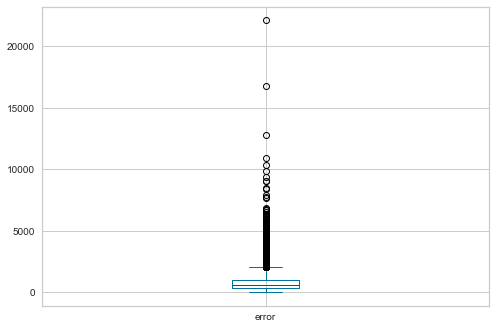

In [195]:
resultat.error.plot(kind="box")

In [196]:
#En generale on commet des erreurs de 477 euros au niveau des prix

In [197]:
resultat["error_relative"]=resultat["error"]/resultat["realite"]*100
resultat


,realite,prediction,error,error_relative
29996,716,-45.949440,761.949440,106.417520
44158,1565,2349.108893,784.108893,50.102805
1128,2919,3733.031926,814.031926,27.887356
46698,1792,2647.732195,855.732195,47.752913
22570,10619,11250.207483,631.207483,5.944133
...,...,...,...,...
8534,4429,5157.855237,728.855237,16.456429
24265,12492,12260.290028,231.709972,1.854867
4733,573,222.429265,350.570735,61.181629
2807,3264,4110.597169,846.597169,25.937413


In [198]:
resultat.sort_values(by="error_relative")

,realite,prediction,error,error_relative
21833,9900,9899.397311,0.602689,0.006088
51067,2332,2332.348901,0.348901,0.014961
44552,1605,1605.355094,0.355094,0.022124
15202,6108,6106.593622,1.406378,0.023025
19583,8213,8215.718574,2.718574,0.033101
...,...,...,...,...
24,353,-2565.499025,2918.499025,826.770262
10021,413,-3297.370560,3710.370560,898.394809
31962,452,-3662.209926,4114.209926,910.223435
43988,394,-4061.979826,4455.979826,1130.959347


In [199]:
resultat.describe()

,realite,prediction,error,error_relative
count,10759.000000,10759.000000,10759.000000,10759.000000
mean,3963.729157,3976.689192,810.686052,44.455360
std,3999.124503,3839.561912,874.974747,74.437055
min,326.000000,-4560.554336,0.348901,0.006088
25%,965.000000,985.435567,304.452352,10.437003
50%,2444.000000,3030.432285,610.437800,23.048043
75%,5376.000000,6151.973927,996.206530,44.021714
max,18781.000000,34814.220726,22112.477937,1185.327565


In [200]:
#En generale on commet des erreurs de 477 euros au niveau des prix ou soit 15% d'erreur relative en moyenne

<AxesSubplot:ylabel='Density'>

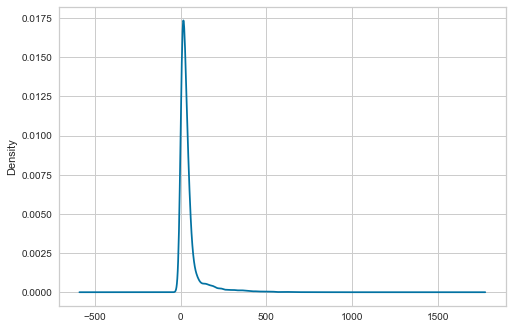

In [201]:
resultat.error_relative.plot(kind="density")

In [202]:
import scipy
#H0: tout est normal
scipy.stats.shapiro(resultat.error_relative) #pvalue="erreur que je commets en disant que la variable n est normale"

C:\Users\sambe\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5129609107971191, pvalue=0.0)

In [203]:
#pvalue<5% donc les erreurs ne sont pas NORMALES!!!
#le modele commet trop d'erreur car ces derniers ne sont normales (les erreurs ne sont pas isssues de phenomenes hasardeures)

In [204]:
X.head(1)

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,38.20203,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [205]:
model.coef_

array([ 7.92511172e+03, -1.07055725e+01, -1.97532844e+01,  6.05906016e+00,
       -6.10538929e+02,  9.87479556e-01,  2.65009910e+02,  1.79565882e+02,
        1.64975658e+02,  8.28916696e+02,  6.16606849e+02,  5.18940683e+02,
        3.17259318e+02, -1.53789937e+02, -6.10538381e+02, -1.51739523e+03,
       -3.77624232e+03,  1.58651876e+03, -2.27403457e+02, -1.16022235e+03,
        7.24322329e+02,  4.18838483e+02,  1.27246994e+03,  1.16171861e+03])

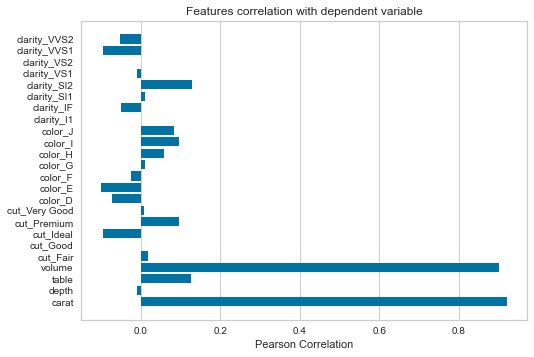

In [206]:
from yellowbrick.target import FeatureCorrelation
import numpy as np
visualizer = FeatureCorrelation()
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()   ;        # Finalize and render the figure

C:\Users\sambe\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


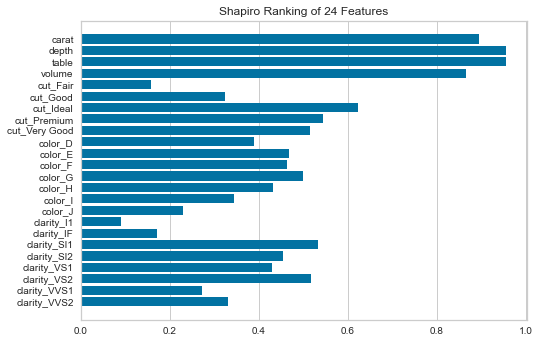

<AxesSubplot:title={'center':'Shapiro Ranking of 24 Features'}>

In [207]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


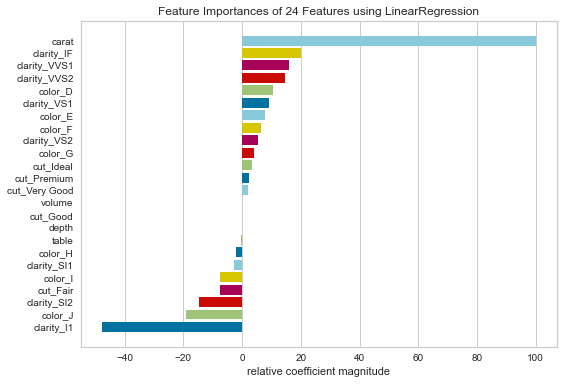

In [209]:

from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model)
viz.fit(X_test, y_test)
viz.show();

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


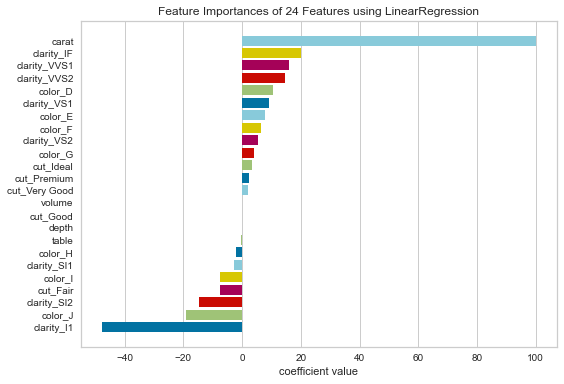

In [211]:
viz = FeatureImportances(model, relative=False)
viz.fit(X_test, y_test)
viz.show();

In [ ]:
#maintenant il faut tourner le modele sans les donnees volume, cut_good, depth, table 

In [212]:
X.shape

(53794, 24)

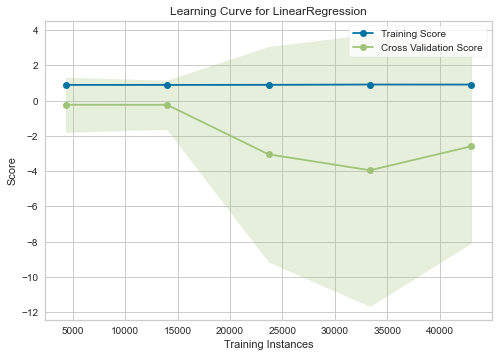

<AxesSubplot:title={'center':'Learning Curve for LinearRegression'}, xlabel='Training Instances', ylabel='Score'>

In [214]:

from yellowbrick.model_selection import LearningCurve

# Instantiate the regression model and visualizer
visualizer = LearningCurve(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [ ]:
#conclusion: il n'est pas necessaire de demander plus de données (cout elevé, temps de calcul)